In [2]:
import numpy as np
import math
from sklearn.model_selection import train_test_split
from data import *
from evaluation import *
%matplotlib inline

### 加载数据集

In [3]:
data_dir = 'datasets/ml-100k/u.data' 
N, M, data_list, _ = load_data(file_dir=data_dir)
print(' data length: %d \n user number: %d \n item number: %d' %(len(data_list),N,M))

 data length: 100000 
 user number: 943 
 item number: 1682


### 分割数据集

In [4]:
train_list, test_list = train_test_split(data_list,test_size=0.2)
print ('train length: %d \n test length: %d' %(len(train_list),len(test_list)))

train length: 80000 
 test length: 20000


### 将 list 转换成 矩阵

In [5]:
train_mat = sequence2mat(sequence = train_list, N = N, M = M)
test_mat = sequence2mat(sequence = test_list, N = N, M = M)

### 参数设置

In [11]:
users_num = N            #用户数
items_num = M            #商品数
hidden_size = 500        #隐层节点数目，即用户的嵌入空间维度
batch_size = 256         #batch大小
lamda_regularizer = 1e-3 #正则项系数
learning_rate = 1e-3  #学习率
epoches  = 100
embedding_size = 8

### 1. MLP

epoch:0  loss=13.8889; 
 MAE=3.4817; RMSE=3.6595; Recall=0.0163; Precision=0.0346; Hit=0.0163; NDCG=0.0071
epoch:10  loss=1.3124; 
 MAE=0.8106; RMSE=1.0135; Recall=0.0547; Precision=0.1160; Hit=0.0547; NDCG=0.0277
epoch:20  loss=1.0300; 
 MAE=0.7608; RMSE=0.9597; Recall=0.0435; Precision=0.0924; Hit=0.0435; NDCG=0.0196
epoch:30  loss=0.7246; 
 MAE=0.7514; RMSE=0.9500; Recall=0.0374; Precision=0.0792; Hit=0.0374; NDCG=0.0163
epoch:40  loss=0.9613; 
 MAE=0.7498; RMSE=0.9474; Recall=0.0362; Precision=0.0767; Hit=0.0362; NDCG=0.0158
epoch:50  loss=0.8649; 
 MAE=0.7477; RMSE=0.9462; Recall=0.0327; Precision=0.0694; Hit=0.0327; NDCG=0.0146
epoch:60  loss=1.0315; 
 MAE=0.7472; RMSE=0.9458; Recall=0.0328; Precision=0.0695; Hit=0.0328; NDCG=0.0146
epoch:70  loss=1.2084; 
 MAE=0.7473; RMSE=0.9456; Recall=0.0301; Precision=0.0637; Hit=0.0301; NDCG=0.0137
epoch:80  loss=1.0308; 
 MAE=0.7456; RMSE=0.9456; Recall=0.0279; Precision=0.0593; Hit=0.0279; NDCG=0.0128
epoch:90  loss=0.7231; 
 MAE=0.7475; 

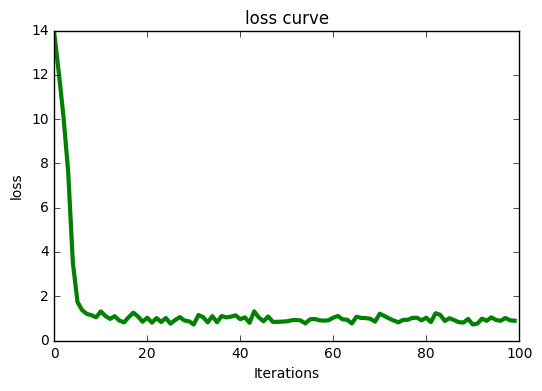

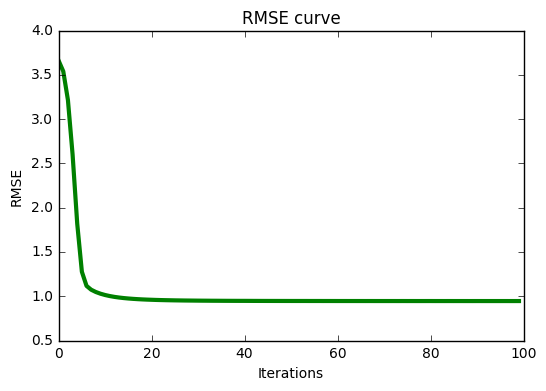

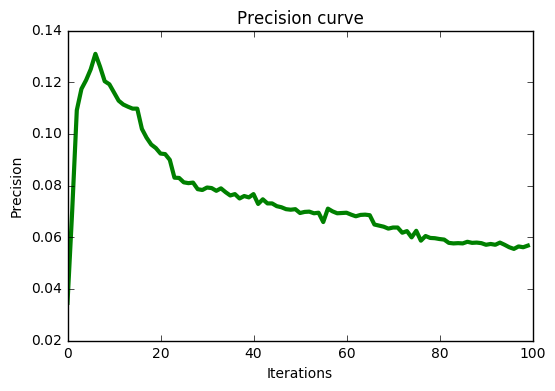

In [9]:
from mlp import *
learning_rate = 1e-4  #学习率
hidden_sizes = [embedding_size,int(embedding_size/2)]
model = mlp(users_num = users_num,
            items_num = items_num,
            embedding_size = embedding_size,
            hidden_sizes = hidden_sizes,
            learning_rate = learning_rate,
            lamda_regularizer = lamda_regularizer,
            batch_size = batch_size)

records_list = []
input_data = train_list
for epoch in range(epoches):
    data_mat = np.random.permutation(input_data) 
    loss = model.train(data_sequence=data_mat)
    pred_mat = model.predict_ratings(data_sequence=test_list)
    mae, rmse, recall, precision = evaluation(pred_mat, train_mat, test_mat)
    records_list.append([loss[-1],mae, rmse, recall, precision])
    if epoch % 10==0:
        topn = get_topn(pred_mat, train_mat, n=10)
        hit_list, ndcg_list = hit_ndcg(test_sequence=np.array(test_list), ranklist=topn)
        hit, ndcg = np.array(hit_list).mean(),np.array(ndcg_list).mean()
        print('epoch:%d  loss=%.4f; \n MAE=%.4f; RMSE=%.4f; Recall=%.4f; Precision=%.4f; Hit=%.4f; NDCG=%.4f'
              %(epoch, loss[-1], mae, rmse, recall, precision, hit, ndcg))

figure(values_list=np.array(records_list)[:,0],name='loss')
figure(values_list=np.array(records_list)[:,2],name='RMSE')
figure(values_list=np.array(records_list)[:,-1],name='Precision')

### 4. AutoRec
- 基于用户的 autorec 模型

epoch:0  loss=18.7725; 
 MAE=2.5896; RMSE=2.9917; Recall=0.0107; Precision=0.0228
epoch:10  loss=7.6541; 
 MAE=0.9232; RMSE=1.1557; Recall=0.0167; Precision=0.0354
epoch:20  loss=5.7720; 
 MAE=0.8840; RMSE=1.1059; Recall=0.0225; Precision=0.0476
epoch:30  loss=4.4838; 
 MAE=0.8712; RMSE=1.0888; Recall=0.0242; Precision=0.0513
epoch:40  loss=3.4905; 
 MAE=0.8622; RMSE=1.0760; Recall=0.0275; Precision=0.0583
epoch:50  loss=2.8091; 
 MAE=0.8543; RMSE=1.0656; Recall=0.0291; Precision=0.0618
epoch:60  loss=2.3000; 
 MAE=0.8487; RMSE=1.0574; Recall=0.0310; Precision=0.0657
epoch:70  loss=1.9391; 
 MAE=0.8451; RMSE=1.0520; Recall=0.0324; Precision=0.0688
epoch:80  loss=1.6394; 
 MAE=0.8417; RMSE=1.0468; Recall=0.0335; Precision=0.0709
epoch:90  loss=1.3985; 
 MAE=0.8389; RMSE=1.0430; Recall=0.0336; Precision=0.0714


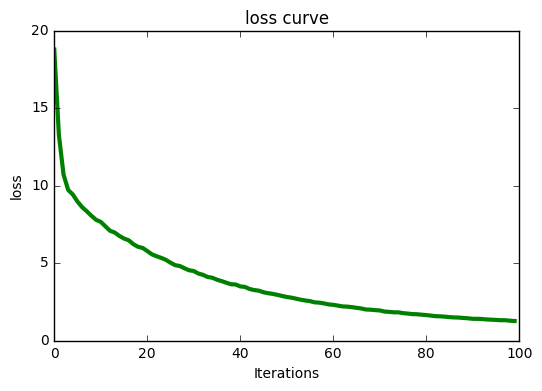

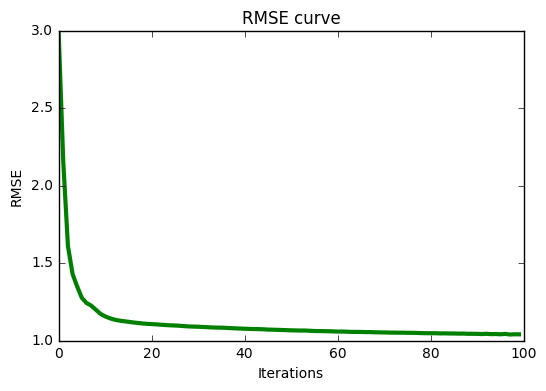

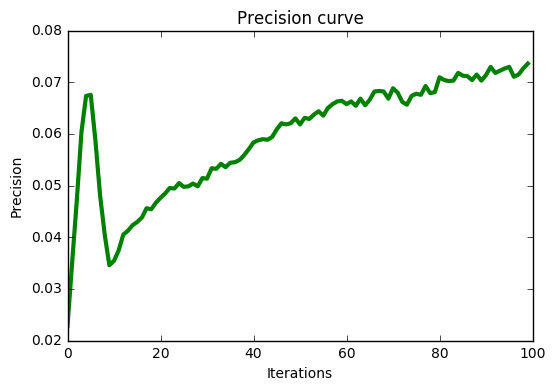

In [12]:
from autorec import *
model = autorec(users_num = users_num,
                items_num = items_num,
                hidden_size = hidden_size,
                batch_size = batch_size,
                learning_rate = learning_rate,
                lamda_regularizer = lamda_regularizer)

records_list = []
for epoch in range(epoches):
    data_mat = np.random.permutation(train_mat) 
    loss = model.train(data_mat=data_mat)
    pred_mat = model.predict_ratings(data_mat=train_mat)
    mae, rmse, recall, precision = evaluation(pred_mat, train_mat, test_mat)
    records_list.append([loss[-1],mae, rmse, recall, precision])
    if epoch % 10==0:
        print('epoch:%d  loss=%.4f; \n MAE=%.4f; RMSE=%.4f; Recall=%.4f; Precision=%.4f'
              %(epoch, loss[-1], mae, rmse, recall, precision))

figure(values_list=np.array(records_list)[:,0],name='loss')
figure(values_list=np.array(records_list)[:,2],name='RMSE')
figure(values_list=np.array(records_list)[:,-1],name='Precision')

### AutoRec
- 基于商品的 autorec 模型

epoch:0  loss=10.4750; 
 MAE=1.8537; RMSE=5.0995; Recall=0.0240; Precision=0.0510
epoch:10  loss=4.5704; 
 MAE=0.8406; RMSE=1.1229; Recall=0.0273; Precision=0.0580
epoch:20  loss=3.4024; 
 MAE=0.8137; RMSE=1.0517; Recall=0.0336; Precision=0.0713
epoch:30  loss=2.5409; 
 MAE=0.7993; RMSE=1.0148; Recall=0.0410; Precision=0.0870
epoch:40  loss=1.9396; 
 MAE=0.7904; RMSE=0.9919; Recall=0.0474; Precision=0.1006
epoch:50  loss=1.5310; 
 MAE=0.7860; RMSE=0.9788; Recall=0.0541; Precision=0.1147
epoch:60  loss=1.2439; 
 MAE=0.7838; RMSE=0.9716; Recall=0.0573; Precision=0.1215
epoch:70  loss=1.0478; 
 MAE=0.7802; RMSE=0.9635; Recall=0.0595; Precision=0.1261
epoch:80  loss=0.9138; 
 MAE=0.7777; RMSE=0.9584; Recall=0.0610; Precision=0.1294
epoch:90  loss=0.7975; 
 MAE=0.7777; RMSE=0.9577; Recall=0.0639; Precision=0.1355


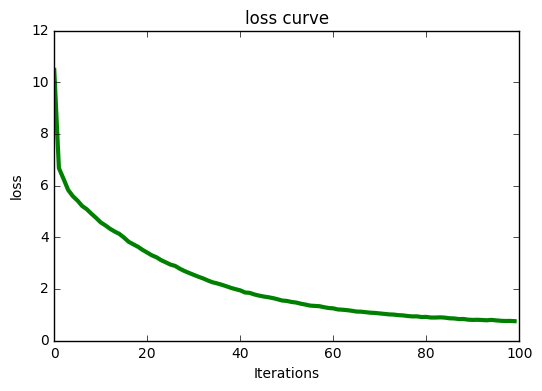

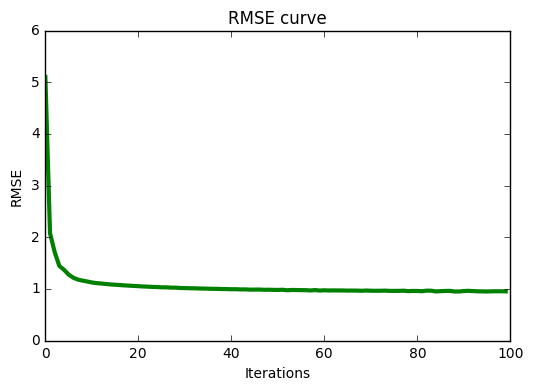

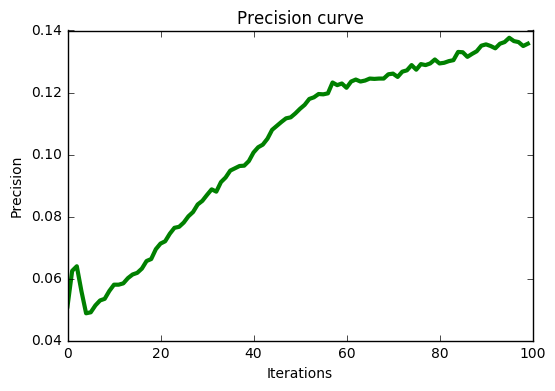

In [11]:
model = autorec(users_num = items_num,
                items_num = users_num,
                hidden_size = hidden_size,
                batch_size = batch_size,
                learning_rate = learning_rate,
                lamda_regularizer = lamda_regularizer)

records_list = []
for epoch in range(epoches):
    data_mat = np.random.permutation(train_mat.T) 
    loss = model.train(data_mat=data_mat)
    pred_mat = model.predict_ratings(data_mat=train_mat.T)
    mae, rmse, recall, precision = evaluation(pred_mat.T, train_mat, test_mat)
    records_list.append([loss[-1],mae, rmse, recall, precision])
    if epoch % 10==0:
        print('epoch:%d  loss=%.4f; \n MAE=%.4f; RMSE=%.4f; Recall=%.4f; Precision=%.4f'
              %(epoch, loss[-1], mae, rmse, recall, precision))

figure(values_list=np.array(records_list)[:,0],name='loss')
figure(values_list=np.array(records_list)[:,2],name='RMSE')
figure(values_list=np.array(records_list)[:,-1],name='Precision')

### 5. CDAE
- 基于用户

epoch:0  loss=49.5955; 
 MAE=2.1029; RMSE=5.6706; Recall=0.0145; Precision=0.0308
epoch:10  loss=10.1589; 
 MAE=2.6123; RMSE=8.3518; Recall=0.0491; Precision=0.1042
epoch:20  loss=9.4686; 
 MAE=2.9019; RMSE=10.0385; Recall=0.0485; Precision=0.1029
epoch:30  loss=8.8841; 
 MAE=2.9282; RMSE=10.2211; Recall=0.0488; Precision=0.1036
epoch:40  loss=8.9273; 
 MAE=2.9155; RMSE=10.1267; Recall=0.0508; Precision=0.1076
epoch:50  loss=9.5272; 
 MAE=2.9096; RMSE=10.0948; Recall=0.0529; Precision=0.1121
epoch:60  loss=8.5919; 
 MAE=2.9076; RMSE=10.0903; Recall=0.0491; Precision=0.1042
epoch:70  loss=8.7455; 
 MAE=2.9200; RMSE=10.1678; Recall=0.0549; Precision=0.1164
epoch:80  loss=8.5345; 
 MAE=2.9143; RMSE=10.1181; Recall=0.0514; Precision=0.1090
epoch:90  loss=9.1166; 
 MAE=2.9105; RMSE=10.1240; Recall=0.0494; Precision=0.1048


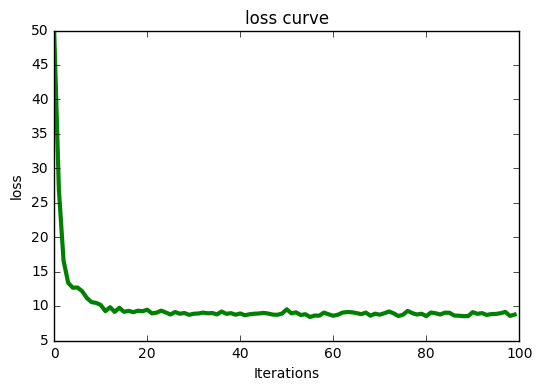

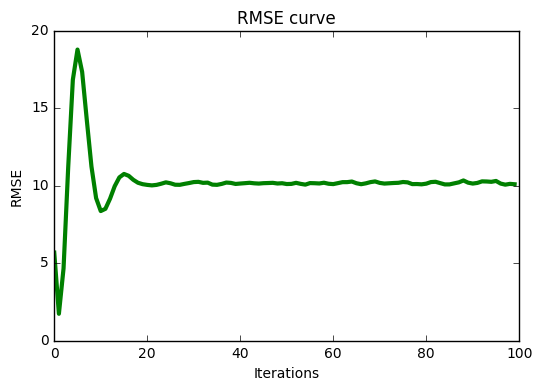

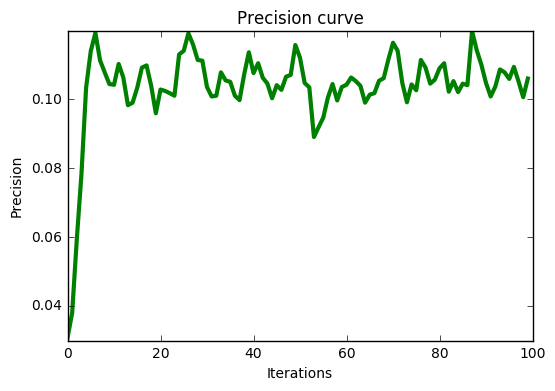

In [8]:
from cdae import *
hidden_size = 50        #隐层节点数目，即用户的嵌入空间维度
lamda_regularizer = 1e-2 #正则项系数
learning_rate = 0.01  #学习率
dropout_rate = 0.5        # dropout rate 
model = cdae(users_num = users_num,
             items_num = items_num,
             hidden_size = hidden_size,
             batch_size = batch_size,
             learning_rate = learning_rate,
             lamda_regularizer = lamda_regularizer,
             dropout_rate = dropout_rate)

user_array = np.array([u for u in range(users_num)])
input_data = np.c_[user_array, train_mat]
records_list = []
for epoch in range(epoches):
    data_mat = np.random.permutation(input_data) 
    loss = model.train(data_mat=data_mat)
    pred_mat = model.predict_ratings(data_mat=np.c_[user_array, train_mat])
    mae, rmse, recall, precision = evaluation(pred_mat, train_mat, test_mat)
    records_list.append([loss[-1],mae, rmse, recall, precision])
    if epoch % 10==0:
        print('epoch:%d  loss=%.4f; \n MAE=%.4f; RMSE=%.4f; Recall=%.4f; Precision=%.4f'
              %(epoch, loss[-1], mae, rmse, recall, precision))

figure(values_list=np.array(records_list)[:,0],name='loss')
figure(values_list=np.array(records_list)[:,2],name='RMSE')
figure(values_list=np.array(records_list)[:,-1],name='Precision')

- 基于商品

epoch:0  loss=30.7612; 
 MAE=1.1538; RMSE=2.0037; Recall=0.0242; Precision=0.0512
epoch:10  loss=8.8757; 
 MAE=2.9567; RMSE=10.1285; Recall=0.0694; Precision=0.1472
epoch:20  loss=8.3818; 
 MAE=2.9470; RMSE=10.0405; Recall=0.0704; Precision=0.1494
epoch:30  loss=8.4252; 
 MAE=2.9705; RMSE=10.1892; Recall=0.0679; Precision=0.1441
epoch:40  loss=8.5532; 
 MAE=2.9684; RMSE=10.1922; Recall=0.0740; Precision=0.1568
epoch:50  loss=8.5284; 
 MAE=2.9607; RMSE=10.1337; Recall=0.0736; Precision=0.1562
epoch:60  loss=8.3302; 
 MAE=2.9018; RMSE=9.7697; Recall=0.0636; Precision=0.1350
epoch:70  loss=8.3040; 
 MAE=2.8864; RMSE=9.6533; Recall=0.0664; Precision=0.1407
epoch:80  loss=8.3288; 
 MAE=2.9436; RMSE=10.0288; Recall=0.0671; Precision=0.1423
epoch:90  loss=8.2134; 
 MAE=2.9342; RMSE=9.9701; Recall=0.0684; Precision=0.1451


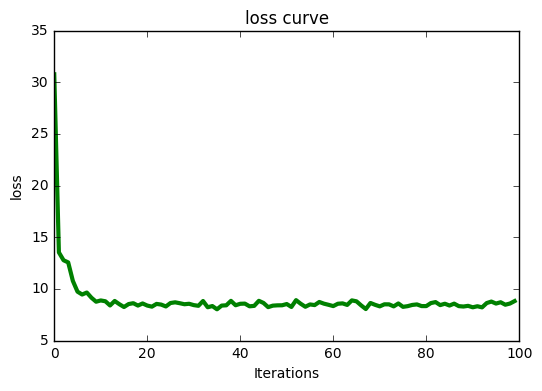

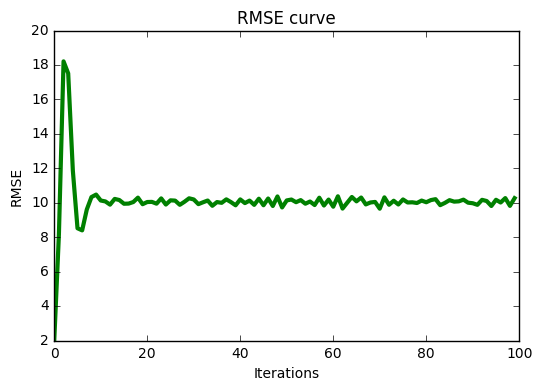

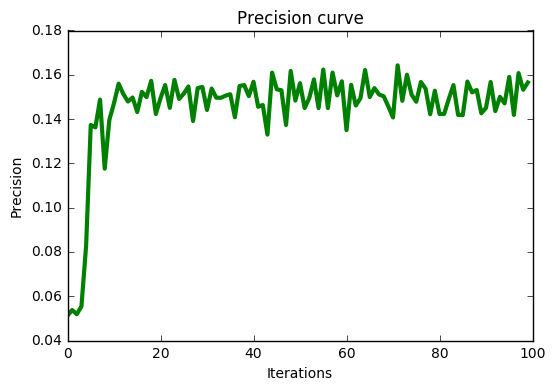

In [10]:
model = cdae(users_num = items_num,
             items_num = users_num,
             hidden_size = hidden_size,
             batch_size = batch_size,
             learning_rate = learning_rate,
             lamda_regularizer = lamda_regularizer,
             dropout_rate = dropout_rate)

item_array = np.array([i for i in range(items_num)])
input_data = np.c_[item_array, train_mat.T]
records_list = []
for epoch in range(epoches):
    data_mat = np.random.permutation(input_data) 
    loss = model.train(data_mat=data_mat)
    pred_mat = model.predict_ratings(data_mat=np.c_[item_array, train_mat.T])
    mae, rmse, recall, precision = evaluation(pred_mat.T, train_mat, test_mat)
    records_list.append([loss[-1],mae, rmse, recall, precision])
    if epoch % 10==0:
        print('epoch:%d  loss=%.4f; \n MAE=%.4f; RMSE=%.4f; Recall=%.4f; Precision=%.4f'
              %(epoch, loss[-1], mae, rmse, recall, precision))

figure(values_list=np.array(records_list)[:,0],name='loss')
figure(values_list=np.array(records_list)[:,2],name='RMSE')
figure(values_list=np.array(records_list)[:,-1],name='Precision')